# Get training logs

In [1]:
import os
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

def get_log(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    tags = event_acc.Tags()['scalars']
    
    # print(tags)
    # raise Exception('stop')
    log = {'step': [], 'ep_rew_mean': []}
    
    for scalar_event in event_acc.Scalars('rollout/ep_rew_mean'):
        log['step'].append(scalar_event.step)
        log['ep_rew_mean'].append(scalar_event.value)
        
    log = {key: np.array(values) for key, values in log.items()}
    # sub sample in steps of 1e6
    indices = log['step'] % 1e6 == 0
    log = {key: values[indices] for key, values in log.items()}
    # get the highest value and corresponding step
    max_index = np.argmax(log['ep_rew_mean'])
    log['max_ep_rew_mean'] = log['ep_rew_mean'][max_index]
    log['max_step'] = log['step'][max_index]
    return log

def reward_plot(log_dir, **kwargs):
    log = get_log(log_dir)
    plt.plot(log['step'], log['ep_rew_mean'], **kwargs)
    plt.scatter(log['max_step'], log['max_ep_rew_mean'], **kwargs)
    
def get_best_model(log_dir):
    log = get_log(log_dir)
    # print('highest mean episode reward:', log['max_ep_rew_mean'], 'at step:', log['max_step'])
    model_dir = log_dir
    model_dir = model_dir.replace('logs', 'models')
    model_dir = model_dir[:-2]
    path_best_model = model_dir + f'/{log["max_step"]}.zip'
    print('best model:', path_best_model, 'mean_ep_rew:', log['max_ep_rew_mean'])
    return path_best_model

# Boxplots of the highest mean episode reward of all training runs

/tmp/ipykernel_2100343/3742972964.py:98: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


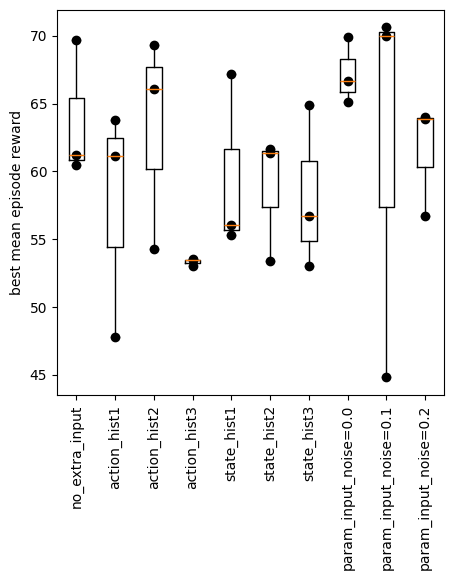

In [2]:
# box plots of the best models
fig, ax = plt.subplots(1,1, figsize=(5,5))

# no action hist
log1 = get_log('logs/nn_size_comparison/run0_64_64_64_0')
log2 = get_log('logs/nn_size_comparison/run1_64_64_64_0')
log3 = get_log('logs/nn_size_comparison/run2_64_64_64_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_no_extra_inputs = f'logs/nn_size_comparison/run{np.argmax(rew)}_64_64_64_0'
ax.boxplot(rew, positions=[0], widths=0.4)
ax.scatter([0]*3, rew, color='k')
# ax.scatter(0, np.mean(rew), color='r', marker='+')
# action hist 1
log1 = get_log('logs/input_comparison/run0_action_history1_0')
log2 = get_log('logs/input_comparison/run1_action_history1_0')
log3 = get_log('logs/input_comparison/run2_action_history1_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_action_hist1 = f'logs/input_comparison/run{np.argmax(rew)}_action_history1_0'
ax.boxplot(rew, positions=[1], widths=0.4)
ax.scatter([1]*3, rew, color='k')
# ax.scatter(1, np.mean(rew), color='r', marker='+')
# action hist 2
log1 = get_log('logs/input_comparison/run0_action_history2_0')
log2 = get_log('logs/input_comparison/run1_action_history2_0')
log3 = get_log('logs/input_comparison/run2_action_history2_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_action_hist2 = f'logs/input_comparison/run{np.argmax(rew)}_action_history2_0'
ax.boxplot(rew, positions=[2], widths=0.4)
ax.scatter([2]*3, rew, color='k')
# ax.scatter(2, np.mean(rew), color='r', marker='+')
# action hist 3
log1 = get_log('logs/input_comparison/run0_action_history3_0')
log2 = get_log('logs/input_comparison/run1_action_history3_0')
log3 = get_log('logs/input_comparison/run2_action_history3_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_action_hist3 = f'logs/input_comparison/run{np.argmax(rew)}_action_history3_0'
ax.boxplot(rew, positions=[3], widths=0.4)
ax.scatter([3]*3, rew, color='k')
# ax.scatter(3, np.mean(rew), color='r', marker='+')
# state hist 1
log1 = get_log('logs/input_comparison/run0_state_history1_0')
log2 = get_log('logs/input_comparison/run1_state_history1_0')
log3 = get_log('logs/input_comparison/run2_state_history1_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_state_hist1 = f'logs/input_comparison/run{np.argmax(rew)}_state_history1_0'
ax.boxplot(rew, positions=[4], widths=0.4)
ax.scatter([4]*3, rew, color='k')
# ax.scatter(4, np.mean(rew), color='r', marker='+')
# state hist 2
log1 = get_log('logs/input_comparison/run0_state_history2_0')
log2 = get_log('logs/input_comparison/run1_state_history2_0')
log3 = get_log('logs/input_comparison/run2_state_history2_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_state_hist2 = f'logs/input_comparison/run{np.argmax(rew)}_state_history2_0'
ax.boxplot(rew, positions=[5], widths=0.4)
ax.scatter([5]*3, rew, color='k')
# ax.scatter(5, np.mean(rew), color='r', marker='+')
# state hist 3
log1 = get_log('logs/input_comparison/run0_state_history3_0')
log2 = get_log('logs/input_comparison/run1_state_history3_0')
log3 = get_log('logs/input_comparison/run2_state_history3_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_state_hist3 = f'logs/input_comparison/run{np.argmax(rew)}_state_history3_0'
ax.boxplot(rew, positions=[6], widths=0.4)
ax.scatter([6]*3, rew, color='k')
# ax.scatter(6, np.mean(rew), color='r', marker='+')
# param input noise=0.0
log1 = get_log('logs/input_comparison/run0_param_input_noise=00_0')
log2 = get_log('logs/input_comparison/run1_param_input_noise=00_0')
log3 = get_log('logs/input_comparison/run2_param_input_noise=00_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_param_input_noise00 = f'logs/input_comparison/run{np.argmax(rew)}_param_input_noise=00_0'
ax.boxplot(rew, positions=[7], widths=0.4)
ax.scatter([7]*3, rew, color='k')
# ax.scatter(7, np.mean(rew), color='r', marker='+')
# param input noise=0.1
log1 = get_log('logs/input_comparison/run0_param_input_noise=01_0')
log2 = get_log('logs/input_comparison/run1_param_input_noise=01_0')
log3 = get_log('logs/input_comparison/run2_param_input_noise=01_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_param_input_noise01 = f'logs/input_comparison/run{np.argmax(rew)}_param_input_noise=01_0'
ax.boxplot(rew, positions=[8], widths=0.4)
ax.scatter([8]*3, rew, color='k')
# ax.scatter(8, np.mean(rew), color='r', marker='+')
# param input noise=0.2
log1 = get_log('logs/input_comparison/run0_param_input_noise=02_0')
log2 = get_log('logs/input_comparison/run1_param_input_noise=02_0')
log3 = get_log('logs/input_comparison/run2_param_input_noise=02_0')
rew = [log1['max_ep_rew_mean'], log2['max_ep_rew_mean'], log3['max_ep_rew_mean']]
best_param_input_noise02 = f'logs/input_comparison/run{np.argmax(rew)}_param_input_noise=02_0'
ax.boxplot(rew, positions=[9], widths=0.4)
ax.scatter([9]*3, rew, color='k')
# ax.scatter(9, np.mean(rew), color='r', marker='+')

ax.set_xticks(range(10))
ax.set_xticklabels(['no_extra_input', 'action_hist1', 'action_hist2', 'action_hist3', 'state_hist1', 'state_hist2', 'state_hist3', 'param_input_noise=0.0', 'param_input_noise=0.1', 'param_input_noise=0.2'], rotation=90)
ax.set_ylabel('best mean episode reward')
fig.show()

# Simulate models

In [2]:
from quad_race_env import *
from randomization import *
from stable_baselines3 import PPO
from quadcopter_animation import animation

#  ANIMATION FUNCTION
def animate_policy(model, env, **kwargs):
    env.reset()
    def run():
        actions, _ = model.predict(env.states)  
        states, rewards, dones, infos = env.step(actions)
        return env.render()
    animation.view(run, gate_pos=env.gate_pos, gate_yaw=env.gate_yaw, **kwargs)
    
def animate_policy_2(model1, model2, env1, env2, **kwargs):
    env1.reset()
    env2.reset()
    def run():
        actions1, _ = model1.predict(env1.states)
        actions2, _ = model2.predict(env2.states)
        
        _, _, _, _ = env1.step(actions1)
        _, _, _, _ = env2.step(actions2)
        
        out1 = env1.render()
        # b, g, r
        out1['color'] = [(255.,0.,0.)]*env1.num_envs
        out2 = env2.render()
        out2['color'] = [(0.,0.,255.)]*env2.num_envs
        
        out = {}
        for key in out1.keys():
            out[key] = np.concatenate([out1[key], out2[key]])
        return out    
    animation.view(run, gate_pos=env1.gate_pos, gate_yaw=env1.gate_yaw, **kwargs)   

python version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
stable_baselines3 version: 2.3.2
torch version: 2.4.0+cu121
cuda available: True
cuda version: 12.1
cudnn version: 90100
device: cuda


In [3]:
log_path = 'logs/nn_size_comparison/run1_64_64_64_0'
# log_path = 'logs/5inch_drone/run0_64_64_64_0'
model = PPO.load(get_best_model(log_path))

env = Quadcopter3DGates(
    num_envs=1,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_big,
    gates_ahead=1,
    initialize_at_random_gates=True,
    pause_if_collision=False,
)
   
animate_policy(model, env)

best model: models/nn_size_comparison/run1_64_64_64/98000000.zip mean_ep_rew: 69.66938018798828


/home/robin/miniconda3/envs/minimal/lib/python3.10/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:77: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


In [ ]:
print('big randomization')
m = get_best_model('logs/nn_size_comparison/run0_64_64_64_0')
m = get_best_model('logs/nn_size_comparison/run1_64_64_64_0')
m = get_best_model('logs/nn_size_comparison/run2_64_64_64_0')
print('3inch fixed params')
m = get_best_model('logs/3inch_drone/run0_fixed_3inch_0')
m = get_best_model('logs/3inch_drone/run1_fixed_3inch_0')
m = get_best_model('logs/3inch_drone/run2_fixed_3inch_0')
print('3inch 10% randomization')
m = get_best_model('logs/3inch_drone/run0_3inch_10_percent_0')
m = get_best_model('logs/3inch_drone/run1_3inch_10_percent_0')
m = get_best_model('logs/3inch_drone/run2_3inch_10_percent_0')
print('3inch 20% randomization')
m = get_best_model('logs/3inch_drone/run0_3inch_20_percent_0')
m = get_best_model('logs/3inch_drone/run1_3inch_20_percent_0')
m = get_best_model('logs/3inch_drone/run2_3inch_20_percent_0')
print('3inch 30% randomization')
m = get_best_model('logs/3inch_drone/run0_3inch_30_percent_0')
m = get_best_model('logs/3inch_drone/run1_3inch_30_percent_0')
m = get_best_model('logs/3inch_drone/run2_3inch_30_percent_0')
print('5inch fixed params')
m = get_best_model('logs/5inch_drone/run0_64_64_64_0')
m = get_best_model('logs/5inch_drone/run1_64_64_64_0')
m = get_best_model('logs/5inch_drone/run2_64_64_64_0')
print('5inch 10% randomization')
m = get_best_model('logs/5inch_drone/run0_5inch_10_percent_0')
m = get_best_model('logs/5inch_drone/run1_5inch_10_percent_0')
m = get_best_model('logs/5inch_drone/run2_5inch_10_percent_0')
print('5inch 20% randomization')
m = get_best_model('logs/5inch_drone/run0_5inch_20_percent_0')
m = get_best_model('logs/5inch_drone/run1_5inch_20_percent_0')
m = get_best_model('logs/5inch_drone/run2_5inch_20_percent_0')
print('5inch 30% randomization')
m = get_best_model('logs/5inch_drone/run0_5inch_30_percent_0')
m = get_best_model('logs/5inch_drone/run1_5inch_30_percent_0')
m = get_best_model('logs/5inch_drone/run2_5inch_30_percent_0')

In [13]:
best_model_bR = 'models/nn_size_comparison/run1_64_64_64/98000000.zip'
best_model_3inch_00pR = 'models/3inch_drone/run0_fixed_3inch/59000000.zip'
best_model_3inch_10pR = 'models/3inch_drone/run0_3inch_10_percent/55000000.zip'
best_model_3inch_20pR = 'models/3inch_drone/run1_3inch_20_percent/86000000.zip'
best_model_3inch_30pR = 'models/3inch_drone/run2_3inch_30_percent/85000000.zip'
best_model_5inch_00pR = 'models/5inch_drone/run2_64_64_64/97000000.zip'
best_model_5inch_10pR = 'models/5inch_drone/run1_5inch_10_percent/63000000.zip'
best_model_5inch_20pR = 'models/5inch_drone/run1_5inch_20_percent/90000000.zip'
best_model_5inch_30pR = 'models/5inch_drone/run0_5inch_30_percent/98000000.zip'

# we will use a seed for the randomization to make sure the randomization is the same for all models
seed = 0

def get_ep_rew(model, env):
    # get episode reward for env.num_envs episodes
    env.reset_seed()
    env.reset()
    ep_done = np.zeros(env.num_envs, dtype=bool)
    ep_rew = np.zeros(env.num_envs)
    while not np.all(ep_done):
        actions, _ = model.predict(env.states)
        states, rewards, dones, infos = env.step(actions)
        # update add reward for each env that is not done
        ep_rew[~ep_done] += rewards[~ep_done]
        # check if any env is done
        ep_done |= dones
    return ep_rew

env = Quadcopter3DGates(
    num_envs=100,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_fixed_params_3inch,
    gates_ahead=1,
    initialize_at_random_gates=True,
    pause_if_collision=False,
    seed=seed
)

# get ep rew for each model
print('3INCH SIMULATIONS')
print('simulating model: big randomization')
ep_rew_bR_on_3inch = get_ep_rew(PPO.load(best_model_bR), env)
print('simulating model: 3inch fixed params')
ep_rew_3inch_00pR_on_3inch = get_ep_rew(PPO.load(best_model_3inch_00pR), env)
print('simulating model: 3inch 10% randomization')
ep_rew_3inch_10pR_on_3inch = get_ep_rew(PPO.load(best_model_3inch_10pR), env)
print('simulating model: 3inch 20% randomization')
ep_rew_3inch_20pR_on_3inch = get_ep_rew(PPO.load(best_model_3inch_20pR), env)
print('simulating model: 3inch 30% randomization')
ep_rew_3inch_30pR_on_3inch = get_ep_rew(PPO.load(best_model_3inch_30pR), env)
print('simulating model: 5inch fixed params')
ep_rew_5inch_00pR_on_3inch = get_ep_rew(PPO.load(best_model_5inch_00pR), env)
print('simulating model: 5inch 10% randomization')
ep_rew_5inch_10pR_on_3inch = get_ep_rew(PPO.load(best_model_5inch_10pR), env)
print('simulating model: 5inch 20% randomization')
ep_rew_5inch_20pR_on_3inch = get_ep_rew(PPO.load(best_model_5inch_20pR), env)
print('simulating model: 5inch 30% randomization')
ep_rew_5inch_30pR_on_3inch = get_ep_rew(PPO.load(best_model_5inch_30pR), env)
print('-'*50)

env = Quadcopter3DGates(
    num_envs=100,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_fixed_params_5inch,
    gates_ahead=1,
    initialize_at_random_gates=True,
    pause_if_collision=False,
    seed=seed
)

print('5INCH SIMULATIONS')
print('simulating model: big randomization')
ep_rew_bR_on_5inch = get_ep_rew(PPO.load(best_model_bR), env)
print('simulating model: 3inch fixed params')
ep_rew_3inch_00pR_on_5inch = get_ep_rew(PPO.load(best_model_3inch_00pR), env)
print('simulating model: 3inch 10% randomization')
ep_rew_3inch_10pR_on_5inch = get_ep_rew(PPO.load(best_model_3inch_10pR), env)
print('simulating model: 3inch 20% randomization')
ep_rew_3inch_20pR_on_5inch = get_ep_rew(PPO.load(best_model_3inch_20pR), env)
print('simulating model: 3inch 30% randomization')
ep_rew_3inch_30pR_on_5inch = get_ep_rew(PPO.load(best_model_3inch_30pR), env)
print('simulating model: 5inch fixed params')
ep_rew_5inch_00pR_on_5inch = get_ep_rew(PPO.load(best_model_5inch_00pR), env)
print('simulating model: 5inch 10% randomization')
ep_rew_5inch_10pR_on_5inch = get_ep_rew(PPO.load(best_model_5inch_10pR), env)
print('simulating model: 5inch 20% randomization')
ep_rew_5inch_20pR_on_5inch = get_ep_rew(PPO.load(best_model_5inch_20pR), env)
print('simulating model: 5inch 30% randomization')
ep_rew_5inch_30pR_on_5inch = get_ep_rew(PPO.load(best_model_5inch_30pR), env)
print('-'*50)

/home/robin/miniconda3/envs/minimal/lib/python3.10/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:77: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


3INCH SIMULATIONS
simulating model: big randomization
simulating model: 3inch fixed params
simulating model: 3inch 10% randomization
simulating model: 3inch 20% randomization
simulating model: 3inch 30% randomization
simulating model: 5inch fixed params
simulating model: 5inch 10% randomization
simulating model: 5inch 20% randomization
simulating model: 5inch 30% randomization
--------------------------------------------------
5INCH SIMULATIONS
simulating model: big randomization
simulating model: 3inch fixed params
simulating model: 3inch 10% randomization
simulating model: 3inch 20% randomization
simulating model: 3inch 30% randomization
simulating model: 5inch fixed params
simulating model: 5inch 10% randomization
simulating model: 5inch 20% randomization
simulating model: 5inch 30% randomization
--------------------------------------------------


/tmp/ipykernel_2101326/180337430.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


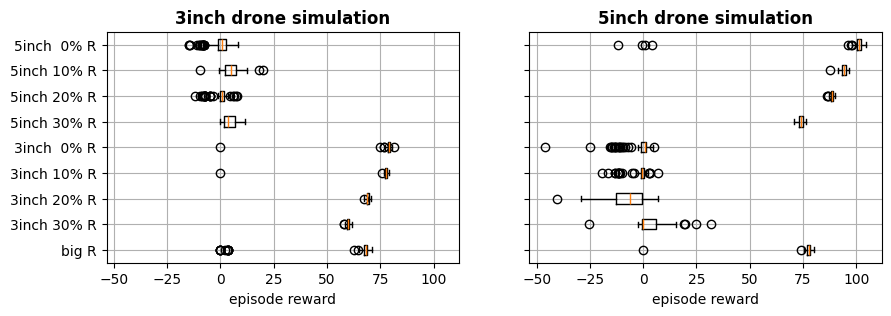

In [14]:
# BOXPLOTS
fig, ax = plt.subplots(1,2, figsize=(10,3), sharey=True, sharex=True)
# 3inch
ax[0].boxplot([
    ep_rew_bR_on_3inch,
    ep_rew_3inch_30pR_on_3inch,
    ep_rew_3inch_20pR_on_3inch,
    ep_rew_3inch_10pR_on_3inch,
    ep_rew_3inch_00pR_on_3inch,
    ep_rew_5inch_30pR_on_3inch,
    ep_rew_5inch_20pR_on_3inch,
    ep_rew_5inch_10pR_on_3inch,
    ep_rew_5inch_00pR_on_3inch,
], positions=[0,1,2,3,4,5,6,7,8], widths=0.4, vert=False)
ax[0].set_yticks(range(9))
ax[0].set_yticklabels([
    'big R',
    '3inch 30% R',
    '3inch 20% R',
    '3inch 10% R',
    '3inch  0% R',
    '5inch 30% R',
    '5inch 20% R',
    '5inch 10% R',
    '5inch  0% R'    
], rotation=0)
ax[0].set_xlabel('episode reward')
ax[0].set_title('3inch drone simulation', fontweight='bold')
ax[0].grid() # grid
# 5inch
ax[1].boxplot([
    ep_rew_bR_on_5inch,
    ep_rew_3inch_30pR_on_5inch,
    ep_rew_3inch_20pR_on_5inch,
    ep_rew_3inch_10pR_on_5inch,
    ep_rew_3inch_00pR_on_5inch,
    ep_rew_5inch_30pR_on_5inch,
    ep_rew_5inch_20pR_on_5inch,
    ep_rew_5inch_10pR_on_5inch,
    ep_rew_5inch_00pR_on_5inch,
], positions=[0,1,2,3,4,5,6,7,8], widths=0.4, vert=False)
ax[1].set_yticks(range(9))
ax[1].set_yticklabels([
    'big R',
    '3inch 30% R',
    '3inch 20% R',
    '3inch 10% R',
    '3inch  0% R',
    '5inch 30% R',
    '5inch 20% R',
    '5inch 10% R',
    '5inch  0% R'
], rotation=0)
ax[1].set_xlabel('episode reward')
ax[1].set_title('5inch drone simulation', fontweight='bold')
ax[1].grid() # grid
fig.show()
    

In [ ]:
env = Quadcopter3DGates(
    num_envs=100,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_fixed_params_5inch,
    gates_ahead=1,
    initialize_at_random_gates=True,
    pause_if_collision=False,
)

# get ep rew for each model
print('simulating model: big randomization')
ep_rew_best_model_big_randomization = get_ep_rew(PPO.load(best_model_big_randomization), env)
print('simulating model: 5inch fixed params')
ep_rew_best_model_5inch_fixed_params = get_ep_rew(PPO.load(best_model_5inch_fixed_params), env)
print('simulating model: 5inch 10% randomization')
ep_rew_best_model_5inch_10_percent_randomization = get_ep_rew(PPO.load(best_model_5inch_10_percent_randomization), env)
print('simulating model: 5inch 20% randomization')
ep_rew_best_model_5inch_20_percent_randomization = get_ep_rew(PPO.load(best_model_5inch_20_percent_randomization), env)
print('simulating model: 5inch 30% randomization')
ep_rew_best_model_5inch_30_percent_randomization = get_ep_rew(PPO.load(best_model_5inch_30_percent_randomization), env)

In [ ]:
# box plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.boxplot([ep_rew_best_model_big_randomization, ep_rew_best_model_5inch_fixed_params, ep_rew_best_model_5inch_10_percent_randomization, ep_rew_best_model_5inch_20_percent_randomization, ep_rew_best_model_5inch_30_percent_randomization])
ax.set_xticks(range(1,6))
ax.set_xticklabels(['big randomization', '5inch fixed params', '5inch 10% randomization', '5inch 20% randomization', '5inch 30% randomization'], rotation=90)
ax.set_ylabel('episode reward')
ax.set_ylim([0, 120])
# title: "Policies evaluated on fixed param simulation 5inch drone"
fig.suptitle('5inch drone simulation')
fig.show()

In [ ]:
# box plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.boxplot([ep_rew_best_model_big_randomization, ep_rew_best_model_3inch_fixed_params, ep_rew_best_model_3inch_10_percent_randomization, ep_rew_best_model_3inch_20_percent_randomization, ep_rew_best_model_3inch_30_percent_randomization])
ax.set_xticks(range(1,6))
ax.set_xticklabels(['big randomization', '3inch fixed params', '3inch 10% randomization', '3inch 20% randomization', '3inch 30% randomization'], rotation=90)
ax.set_ylabel('episode reward')
ax.set_ylim(0, 120)
fig.suptitle('3inch drone simulation')
fig.show()

In [13]:
model1 = PPO.load(best_model_big_randomization)
model2 = PPO.load(best_model_5inch_fixed_params)

randomization=randomization_fixed_params_5inch

env1 = Quadcopter3DGates(
    num_envs=10,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_fixed_params_5inch,
    gates_ahead=1,
    initialize_at_random_gates=False,
    pause_if_collision=False,
)
env2 = Quadcopter3DGates(
    num_envs=10,
    gates_pos=gate_pos,
    gate_yaw=gate_yaw,
    start_pos=start_pos,
    randomization=randomization_fixed_params_5inch,
    gates_ahead=1,
    initialize_at_random_gates=False,
    pause_if_collision=False,
)
   
animate_policy_2(model1, model2, env1, env2)

In [ ]:
# get mean episode reward
ep_rew1 = get_ep_rew(model1, env1, num_ep=100)
ep_rew2 = get_ep_rew(model2, env2, num_ep=100)
print('mean episode reward model1:', np.mean(ep_rew1), 'std episode reward model1:', np.std(ep_rew1))
print('mean episode reward model2:', np.mean(ep_rew2), 'std episode reward model2:', np.std(ep_rew2))
# box plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.boxplot([ep_rew1, ep_rew2], positions=[0,1], widths=0.4)
ax.scatter([0]*len(ep_rew1), ep_rew1, color='k')
ax.scatter([1]*len(ep_rew2), ep_rew2, color='k')
ax.scatter(0, np.mean(ep_rew1), color='r', marker='+')
ax.scatter(1, np.mean(ep_rew2), color='r', marker='+')
ax.set_xticks([0,1])
ax.set_xticklabels(['model1', 'model2'])
ax.set_ylabel('episode reward')
fig.show()